#  Revenue Predicitons with Linear Regression

In this project, I will be using a dataset from an ice cream business. I will use this data to create a Simple Linear Regression Model. The purpose of this model is to predict the daily revenue of the business in dollars based on the temperature outside.

Objective:
A business owner at an ice cream shop has asked me to create a model that could predict the daily revenue in dollars based on the outside temperature (degrees Celsius). The business owner has given me a dataset labeled 'IceCreamData.csv'.

### IMPORT LIBRARIES AND DATASETS

In simple linear regression, we predict the value of one variable y based on another varaible X. We call X the indpenedent varaible and Y is the dependent variable. So y changes depending on X. 

In [1]:
import pandas as pd     #dataframe manipulation
import numpy as np      #numerical analysis and array manipulation
import seaborn as sns      #visualization
import matplotlib.pyplot as plt      #visualization

1)So I would say Outside Air Tempreture will be our feature aka the input which is our independent variable

2)The revenuve will be our output aka dependent variable aka what we're trying to predict

#We already know that naturally as tempreture increases, so do ice cream sales in general 

#So when the model is trained, I need to go ahead and look at the temp then I can predict based on historical data, the revenue should be around this much. 

In [2]:
sales_df = pd.read_csv('IceCreamData.csv')  #reading in the company dataset

In [3]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [155]:
sales_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [156]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


### Get more statistical information about our data: Calculating the average and maximum temperature and revenue

In [4]:
average_temp = sum(sales_df['Temperature'])/len(sales_df['Temperature'])
average_revenue = sum(sales_df['Revenue'])/len(sales_df['Revenue'])

maximum_temp = max(sales_df['Temperature'])
maximum_revenue = max(sales_df['Revenue'])



In [5]:
maximum_revenue

1000.0

In [159]:
average_revenue

521.5707766915399

In [6]:
average_temp

22.23222511340402

In [7]:
maximum_temp

45.0

Or I can simply just do: 

In [160]:
sales_df.mean()

Temperature     22.232225
Revenue        521.570777
dtype: float64

In [161]:
sales_df.max()

Temperature      45.0
Revenue        1000.0
dtype: float64

## Visualizing the Data: Line of Best Fit

Using seaborn to make scatterplot to plot the temperature vs revenue. So each datapoint will be represented by a dot in our scatterplot. 

<AxesSubplot:xlabel='Temperature', ylabel='Revenue'>

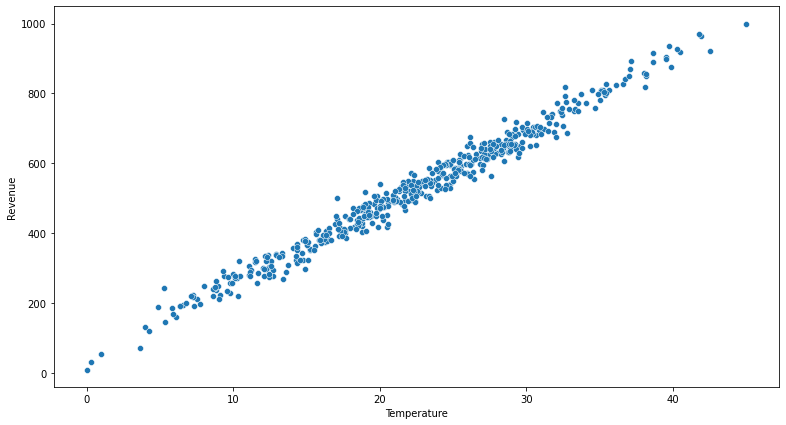

In [8]:
plt.figure(figsize = (13,7)) #setting our image figure size 

#using seaborn
sns.scatterplot(x = 'Temperature', y = 'Revenue', data = sales_df)

Or

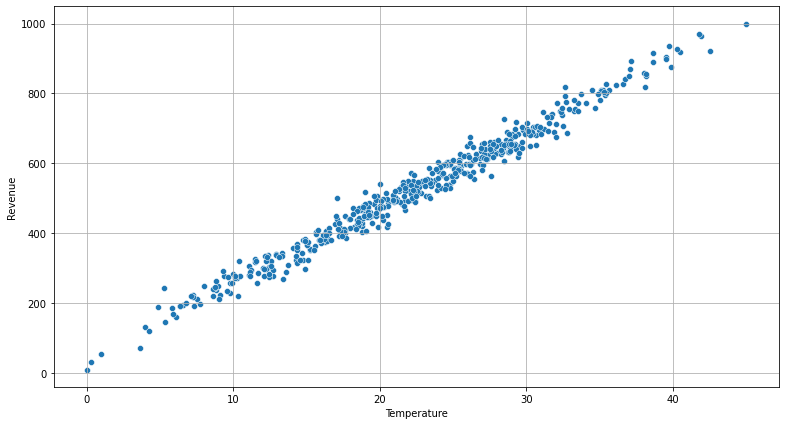

In [9]:
plt.figure(figsize = (13,7)) #setting our image figure size 

#using seaborn
sns.scatterplot(x = sales_df['Temperature'], y = sales_df['Revenue'], data = sales_df)
plt.grid()

Next we're going to try and do a regression plot. Seaborn will help draw the best fit line that can go through the data. We will use sns.regplot() for this

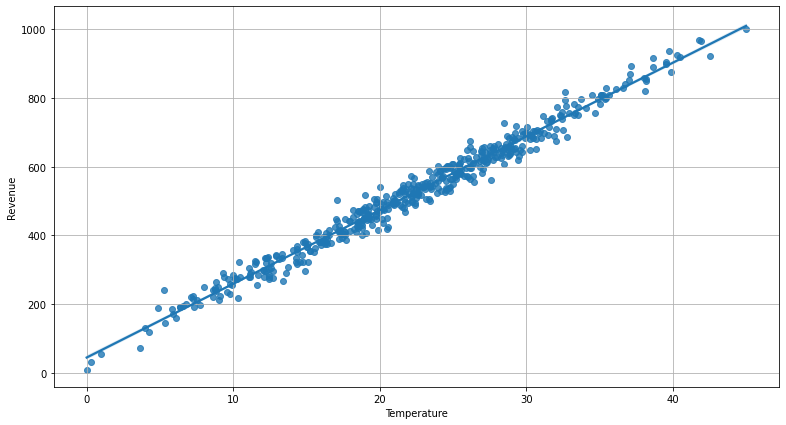

In [10]:
plt.figure(figsize = (13,7))

sns.regplot(x = 'Temperature', y = 'Revenue', data = sales_df)
plt.grid() #add grids to our plot 

now we have a best fit line that goes through our data. In the next lines of code, we'll actually calculate that line. 

# TASK #4: CREATE TESTING AND TRAINING DATASET

So now we want to take our data and split it into training and testing data. So whenever we train any machine learning model, we split the data by allocating around 80% of the data we have to training, then the remaining 20% will be allocated for testing.  

So the overall idea is that we want to train the model with the training data, and then once the model is trained we're going to asess the trained model performance on a dataset that the model has never seen before during training. This is so we have a model that is able to generalize not memorize, meaning the model will actually generate real predictions on an entirely new dataset that we haven't seen before during training. 

In [16]:
#setting what we want our inputs and outputs for our model to be 

X = sales_df['Temperature'] #this will be our input
y = sales_df['Revenue']

In [17]:
#convert x and y to a numpy array, because the datatype needs to be in nd array form
#because after words we will reshape the array and perform train, test, split to that array as well

X = np.array(X)
y = np.array(y)

In [18]:
type(X)

numpy.ndarray

In [19]:
X.shape

(500,)

We're reshaping the array so that afterwords, we can perform the train-test-split appropriately, then train the machine learning model afterwords. 

The reason we need to reshape, is that we need the nd array to be a 2d array.

Remember that 2d arrays can be defined as matrices which can be represented as a collection of rows and columns. 

In [20]:
# reshaping the array from (500,) to (500, 1)
X = X.reshape(-1,1)
print(X.shape)

# reshaping the array from (500,) to (500, 1)
y = y.reshape(-1,1)
print(y.shape)

(500, 1)
(500, 1)


In [22]:
X

array([[24.56688442],
       [26.00519115],
       [27.79055388],
       [20.59533505],
       [11.50349764],
       [14.35251388],
       [13.70777988],
       [30.83398474],
       [ 0.97686999],
       [31.66946458],
       [11.45525338],
       [ 3.66466958],
       [18.81182403],
       [13.62450892],
       [39.53990899],
       [18.48314099],
       [25.93537514],
       [42.51528041],
       [29.58948056],
       [21.77594799],
       [25.45783637],
       [15.21456942],
       [22.61931574],
       [16.25872074],
       [23.88172478],
       [18.97830025],
       [15.6614643 ],
       [29.18504465],
       [19.02461092],
       [35.12015142],
       [24.18393726],
       [15.23119012],
       [ 8.79095281],
       [18.23322784],
       [35.62892497],
       [37.05754246],
       [22.28455032],
       [17.51707397],
       [31.7379196 ],
       [17.04973761],
       [23.0034888 ],
       [ 8.75555394],
       [18.77535808],
       [14.10966102],
       [18.63391286],
       [15

In [23]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #passing in our X and Y to perform train_test_split on
#the test_size being 0.2 means 20% will be allocated for testing and the rest for training


In [24]:
X_train.shape #left with 80% of our data for training

(400, 1)

In [25]:
y_train.shape #left with 80% of our data for training

(400, 1)

In [26]:
y_test.shape #Left with 20% of our data for testing

(100, 1)

In [27]:
X_test.shape #Left with 20% of our data for testing 

(100, 1)

# UNDERSTANDING THE THEORY BEHIND SIMPLE LINER REGRESSION 

#### Simple Linear Regression Basics

Simple Linear Regression looks at the relationship between only two variables x and y. The variable X is the independent variable and the value Y is the dependent variable. This means that we predict the value of Y basd on the existing value of X. If we were working with multiple linear regression, there would be more that two variables at stake.  

When the predictor variable increases or decreases, so does the dependent variable in a Linear way. 

#### The Goal of the Simple Linear Regression Model 

The Line of Best Fit is the goal. The line of best fit best represents the relationship between our variables. 

We want the trained model to be able get that line of best fit after plotting our dataset. Once we have that model, we can use it in the future to generate or make predictions. 

### Math under the hood: Finding the Coefficients 

Math under the hood: Finding the Coefficients 

In school I learned that any straight line, can be represented by y = mx + b. 
x = independent variable, y = dependent variable, b = y intercept, m = the slope of our best fit line

What we're trying to obtain is the optimal values for b and m. When you say that you found these coefficients, that means you have obtained the simple linear regression model. 

The goal is to find what's going to be the b and what's going to be the m.

Now that the model is trained and coeeficients are retrieved, the model can later be used to predict any revenue based on temperature input. 


# TASK #6: TRAIN A SIMPLE LINEAR REGRESSION MODEL IN SCIKIT LEARN

## Creating my official Model

In [29]:
from sklearn.linear_model import LinearRegression #importing our linear regression class  
SimpleLinearRegression = LinearRegression(fit_intercept = True) #instantiate an object out of our class
SimpleLinearRegression.fit(X_train, y_train) #apply the fit method on the SimpleLinearRegression model object, and pass it along the input(X_train) and output (y_train)



LinearRegression()

In [31]:
#plotting our m and our b (our slope and and our y intercept)
print('This is our m Coeff:', SimpleLinearRegression.coef_) #slope of our line
print('This is our b Coeff:', SimpleLinearRegression.intercept_) #y intercept

This is our m Coeff: [[21.5140177]]
This is our b Coeff: [43.27008107]


##### Line of best fit that goes through the origin 

To get a line of best fit that goes through the origin, we set the fit_intercept to be equal to false: 

This then forces the line of best-fit to go through the origin, which means we want the coefficient b (our y intercept) to be equals to zero. This will impact the slope of our line. 

In [32]:
from sklearn.linear_model import LinearRegression 

SimpleRegression2 = LinearRegression(fit_intercept = False)

SimpleRegression2.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [33]:
print('Linear Model Coeff(m)', SimpleRegression2.coef_) #our m
print('Linear Model Coeff(b)', SimpleRegression2.intercept_) #our b

Linear Model Coeff(m) [[23.22000613]]
Linear Model Coeff(b) 0.0


# TASK #7: EVALUATE TRAINED SIMPLE LINEAR REGRESSION MODEL IN SCIKIT LEARN

#### Plotting our training data without the linear model (line of best fit) 

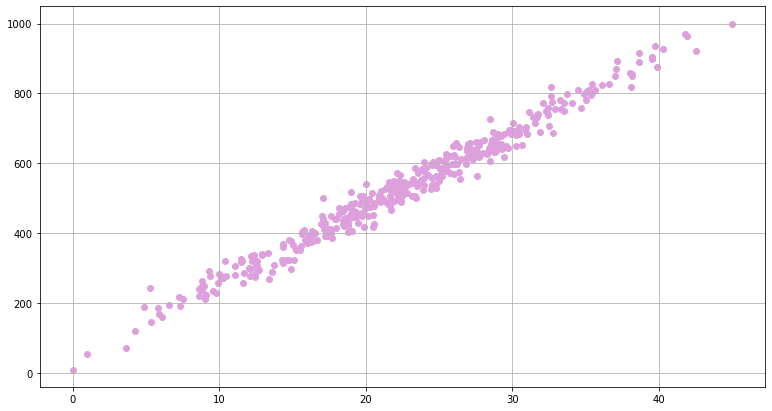

In [76]:
plt.figure(figsize = (13,7))

plt.scatter(X_train, y_train, color = 'plum')
plt.grid()


#### Plotting our training data with our prediction

Text(0.5, 1.0, 'Revenue Generated vs Outside Temperature')

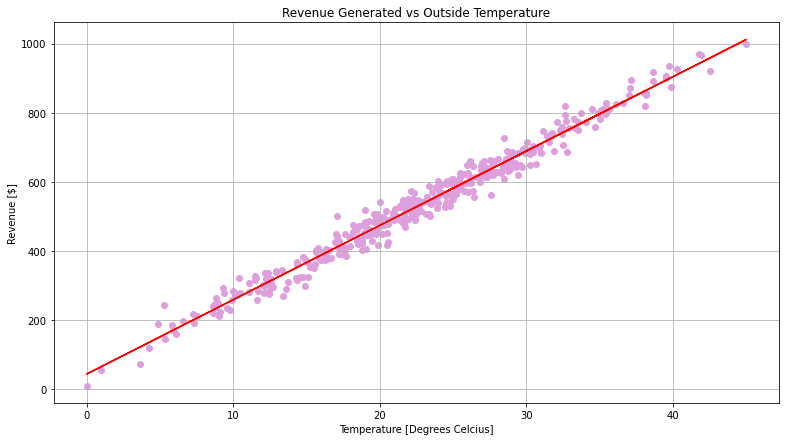

In [68]:
plt.figure(figsize = (13,7))

plt.scatter(X_train, y_train, color = 'plum')
plt.plot(X_train, SimpleLinearRegression.predict(X_train), color ='r' )#plotting our line of best fit 
plt.grid()

plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [Degrees Celcius]')
plt.title('Revenue Generated vs Outside Temperature')

# CHECKING THE ACCURACY OF OUR MODEL

Next we're going to apply the score method, and pass it along to our testing data (X_test and y_test). This will show the accuracy of the model.

In [63]:
Results_LinearRegression = SimpleLinearRegression.score(X_test, y_test)
Results_LinearRegression

0.9851920689930039

### Plotting the Testing Data

Now I want to pretty much plot the same exact plot, but this time I want to plot it for the testing data instead of the training data. I want to see how the model will perfrom for the testing data. 

Text(0.5, 1.0, 'Revenue Generated vs Outside Temperature')

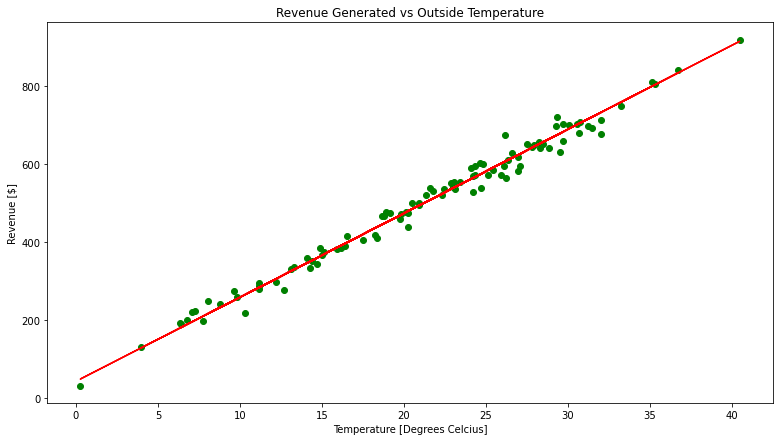

In [67]:
plt.figure(figsize = (13,7))

plt.scatter(X_test, y_test, color = 'green') # making a scatter for the datapoints first
plt.plot(X_test, SimpleLinearRegression.predict(X_test), color = 'r') #now plotting the line of best fit 

plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [Degrees Celcius]')
plt.title('Revenue Generated vs Outside Temperature')

# Putting the Model to Use 

I'm going to take my model and put it to use by playing around with it and using real values. 

Say I'm the business owner, and I opened the store today, I opened the news and found out that the temperature will be around 20C. I now have a model to help me predict what my revenue might be. 

In [75]:
# Using the trained model to generate predictions

Temp = np.array([30]) #pass our degrees to an array 
Temp = Temp.reshape(-1,1)  #reshaping our array, by adding an additional dimension

Revenue = SimpleLinearRegression.predict(Temp) #applying the predict method on our model, and passing Temp to it
print('Revenue Predictions =', Revenue)


Revenue Predictions = [[688.6906121]]


In [74]:
Temperature = np.array([55])
Temperature = Temperature.reshape(-1,1)

Summer_Revenue = SimpleLinearRegression.predict(Temperature)
print(Summer_Revenue)

[[1226.54105463]]


In [73]:
Temperature_w = np.array([7])
Temperature_w = Temperature_w.reshape(-1,1)

Winter_Revenue = SimpleLinearRegression.predict(Temperature_w)
print(Winter_Revenue)


[[193.86820497]]


My results seem to make logical sense, so that means the model is good!